## Particle Swarm Optimization
Ref - https://towardsdatascience.com/particle-swarm-optimization-visually-explained-46289eeb2e14

In [27]:
%matplotlib inline

### Import Package

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sys

### PSO implementation

In [19]:
class PSO:
    def __init__(self, particles, velocities, fitness_func,
                 w=0.8, c1=1, c2=1, max_iter=100, auto_coef=True):
        """
        Args:
            particles (numpy array): Particle position. (#Particle, #Feature)
            velocities (numpy array): Particle velocity. (#Particle, #Feature)
            fitness_func (function): Fitness function.
            w/c1/c2 (float): PSO hyperparameter.
            max_iter (int): Max iteration for PSO.
            auto_coef (bool): Enable automatic hyperparameter update.
        
        """
        # Initialization
        self.particles = particles
        self.velocities = velocities
        self.fitness_func = fitness_func

        self.N = len(self.particles)
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.auto_coef = auto_coef
        self.max_iter = max_iter

        # Initialize personal / global best
        self.p_bests = self.particles
        self.p_bests_values = self.fitness_func(self.particles)
        self.g_best = self.p_bests[0]
        self.g_best_value = self.p_bests_values[0]
        self.update_bests()

        # Initialize hyperparameter
        self.iter = 0
        self.is_running = True
        self.update_coef()

    def next(self):
        # PSO flow
        self.move_particles()
        self.update_bests()
        self.update_coef()

        # Iteration counter
        self.iter += 1
        self.is_running = self.is_running and self.iter < self.max_iter
    
        return self.is_running

    def update_coef(self):
        if self.auto_coef:
            self.w = (0.4 / self.max_iter**2) * (self.iter - self.max_iter) ** 2 + 0.4
            self.c1 = -3 * self.iter / self.max_iter + 3.5
            self.c2 =  3 * self.iter / self.max_iter + 0.5

    def move_particles(self):
        # Inertia Component
        new_velocities = self.w * self.velocities
    
        # Cognitive Component
        r1 = np.random.random(self.N)
        r1 = np.tile(r1[:, np.newaxis], (1, self.particles.shape[-1]))
        new_velocities += r1 * self.c1 * (self.p_bests - self.particles)

        # Social Component
        r2 = np.random.random(self.N)
        r2 = np.tile(r2[:, np.newaxis], (1, self.particles.shape[-1]))
        g_best = np.tile(self.g_best[np.newaxis, :], (self.N, 1))
        new_velocities += r2 * self.c2 * (g_best - self.particles)

        # Check termination condition 
        self.is_running = np.sum(self.velocities - new_velocities) != 0

        # Update position and velocity
        self.particles += new_velocities
        self.velocities = new_velocities

    def update_bests(self):
        # Compute fitness of each particle
        fits = self.fitness_func(self.particles)

        # Find best particle position (personal and global)
        for i in range(self.N):
            # update best personnal value (cognitive)
            if fits[i] < self.p_bests_values[i]:
                self.p_bests_values[i] = fits[i]
                self.p_bests[i] = self.particles[i]

            # update best global value (social)
            if fits[i] < self.g_best_value:
                self.g_best_value = fits[i]
                self.g_best = self.particles[i]

### Parameter

In [20]:
N_PARTICLE = 100
PSO_PARAM_W = 0.1
PSO_PARAM_C1 = 4.0
PSO_PARAM_C2 = 0.0

### Data Preparation

In [21]:
# Search Space
X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.05)
meshgrid = np.meshgrid(X, Y)

In [22]:
# Fitness function
f = lambda x, y: x ** 2 + (y + 1) ** 2 - 5 * np.cos(1.5 * x + 1.5) - 5 * np.cos(2 * y - 1.5)

def fitness_function(pos):
    x, y = pos.swapaxes(0, 1)
    return f(x, y)

In [23]:
# Particle position / velocity initialization
particles = np.random.uniform(-5, 5, (N_PARTICLE, 2))
velocities = (np.random.random((N_PARTICLE, 2)) - 0.5) / 10

### Run PSO

In [38]:
pso = PSO(particles.copy(), velocities.copy(), fitness_function,
          PSO_PARAM_W, PSO_PARAM_C1, PSO_PARAM_C2, True)

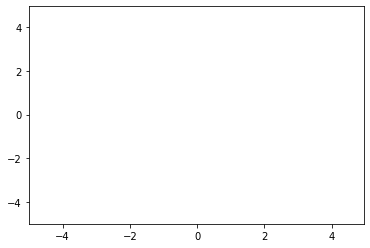

In [46]:
pso.next()
plt.plot(pso.particles[:, 0], pso.particles[:, 1], 'o')
plt.xlim([X[0], X[-1]])
plt.ylim([Y[0], Y[-1]])
plt.show()